In [1]:
import matplotlib
import itertools


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv('network_backup_dataset.csv')


# Preprocess raw_data to data (numerical representation)
weekdays = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data = np.zeros(raw_data.shape)
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        if j == 1: # Day of week
            data[i][j] = float(weekdays[raw_data.loc[i]['Day of Week']])
        elif j == 3: # workflow id
            data[i][j] = float(raw_data.loc[i]['Work-Flow-ID'].split('_')[-1])
        elif j == 4: # file name id
            data[i][j] = float(raw_data.loc[i]['File Name'].split('_')[-1])
        else:
            data[i][j] = float(raw_data.loc[i][j])



Work Flow 0
Fold 1: train RMSE = 0.036, test RMSE = 0.037
Fold 2: train RMSE = 0.036, test RMSE = 0.035
Fold 3: train RMSE = 0.036, test RMSE = 0.037
Fold 4: train RMSE = 0.036, test RMSE = 0.037
Fold 5: train RMSE = 0.036, test RMSE = 0.036
Fold 6: train RMSE = 0.036, test RMSE = 0.034
Fold 7: train RMSE = 0.036, test RMSE = 0.037
Fold 8: train RMSE = 0.036, test RMSE = 0.034
Fold 9: train RMSE = 0.036, test RMSE = 0.037
Fold 10: train RMSE = 0.036, test RMSE = 0.034


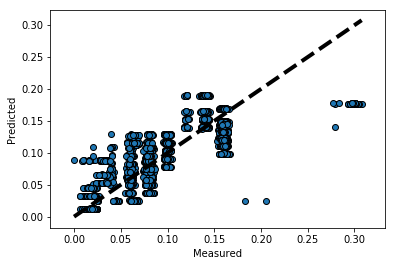

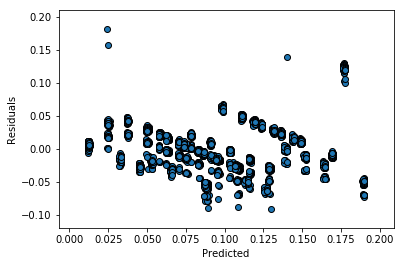

Work Flow 1
Fold 1: train RMSE = 0.146, test RMSE = 0.170
Fold 2: train RMSE = 0.151, test RMSE = 0.124
Fold 3: train RMSE = 0.146, test RMSE = 0.170
Fold 4: train RMSE = 0.151, test RMSE = 0.124
Fold 5: train RMSE = 0.146, test RMSE = 0.170
Fold 6: train RMSE = 0.151, test RMSE = 0.124
Fold 7: train RMSE = 0.146, test RMSE = 0.170
Fold 8: train RMSE = 0.151, test RMSE = 0.124
Fold 9: train RMSE = 0.146, test RMSE = 0.170
Fold 10: train RMSE = 0.151, test RMSE = 0.124


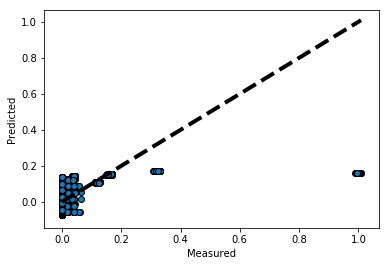

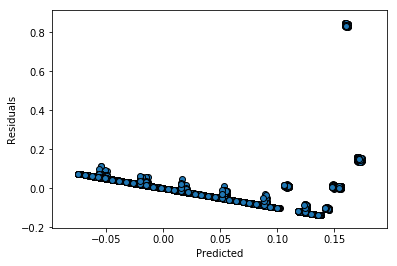

Work Flow 2
Fold 1: train RMSE = 0.044, test RMSE = 0.036
Fold 2: train RMSE = 0.042, test RMSE = 0.048
Fold 3: train RMSE = 0.044, test RMSE = 0.036
Fold 4: train RMSE = 0.042, test RMSE = 0.047
Fold 5: train RMSE = 0.044, test RMSE = 0.036
Fold 6: train RMSE = 0.042, test RMSE = 0.053
Fold 7: train RMSE = 0.043, test RMSE = 0.038
Fold 8: train RMSE = 0.042, test RMSE = 0.048
Fold 9: train RMSE = 0.044, test RMSE = 0.035
Fold 10: train RMSE = 0.042, test RMSE = 0.049


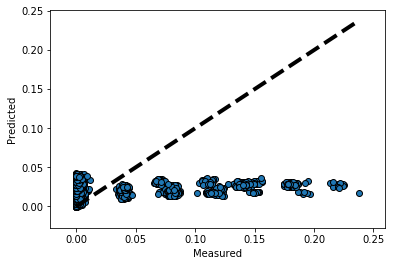

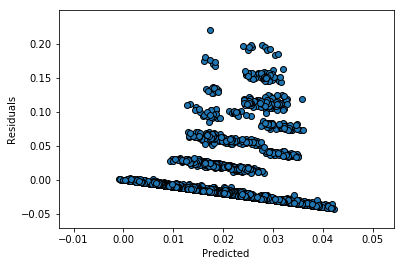

Work Flow 3
Fold 1: train RMSE = 0.007, test RMSE = 0.006
Fold 2: train RMSE = 0.007, test RMSE = 0.008
Fold 3: train RMSE = 0.007, test RMSE = 0.006
Fold 4: train RMSE = 0.007, test RMSE = 0.008
Fold 5: train RMSE = 0.007, test RMSE = 0.006
Fold 6: train RMSE = 0.007, test RMSE = 0.008
Fold 7: train RMSE = 0.007, test RMSE = 0.007
Fold 8: train RMSE = 0.007, test RMSE = 0.009
Fold 9: train RMSE = 0.007, test RMSE = 0.006
Fold 10: train RMSE = 0.007, test RMSE = 0.008


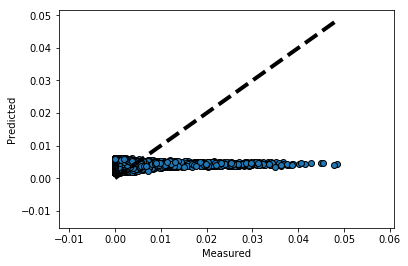

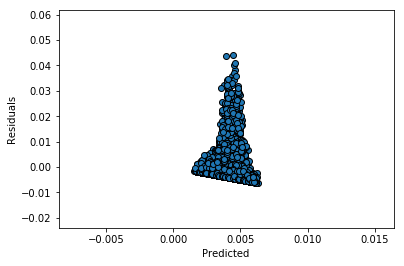

Work Flow 4
Fold 1: train RMSE = 0.087, test RMSE = 0.074
Fold 2: train RMSE = 0.085, test RMSE = 0.096
Fold 3: train RMSE = 0.087, test RMSE = 0.075
Fold 4: train RMSE = 0.085, test RMSE = 0.097
Fold 5: train RMSE = 0.087, test RMSE = 0.076
Fold 6: train RMSE = 0.085, test RMSE = 0.095
Fold 7: train RMSE = 0.087, test RMSE = 0.075
Fold 8: train RMSE = 0.085, test RMSE = 0.096
Fold 9: train RMSE = 0.087, test RMSE = 0.075
Fold 10: train RMSE = 0.085, test RMSE = 0.096


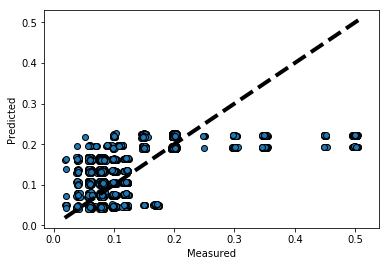

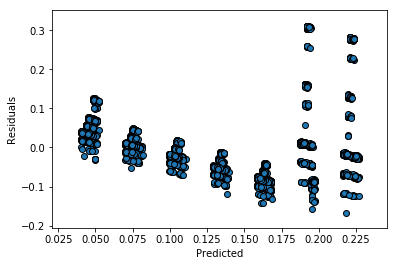

In [2]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

X = data[:,0:5]
y = data[:,5]

for wid in range(5):
    print("Work Flow %i" % wid)
    wid_data = data[(data[:,3] == wid)]
    X_wid = np.delete(wid_data[:,0:5], 3, axis=1)
    y_wid = wid_data[:,5]
    scaler = StandardScaler()
    X_wid = scaler.fit_transform(X_wid, y_wid)
    
    kf = KFold(10)
    k = 1
    lr = linear_model.LinearRegression()
    for train_index, test_index in kf.split(X_wid): 
        X_train, X_test = X_wid[train_index], X_wid[test_index]
        y_train, y_test = y_wid[train_index], y_wid[test_index]
        lr.fit(X_train, y_train)
        pred_train, pred_test = lr.predict(X_train), lr.predict(X_test)

        rmse_train, rmse_test = sqrt(mean_squared_error(y_train, pred_train)), sqrt(mean_squared_error(y_test, pred_test))
        print("Fold %i: train RMSE = %.3f, test RMSE = %.3f" % (k, rmse_train, rmse_test))
        k += 1
    
    lr = linear_model.LinearRegression()
    predicted = cross_val_predict(lr, X_wid, y_wid, cv=10)

    fig, ax = plt.subplots()
    ax.scatter(y_wid, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_wid.min(), y_wid.max()], [y_wid.min(), y_wid.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

    fig, ax = plt.subplots()
    residuals = y_wid - predicted
    ax.scatter(predicted, residuals, edgecolors=(0, 0, 0))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Residuals')
    plt.show()

Work Flow 0


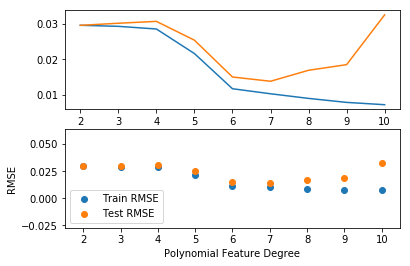

Work Flow 1


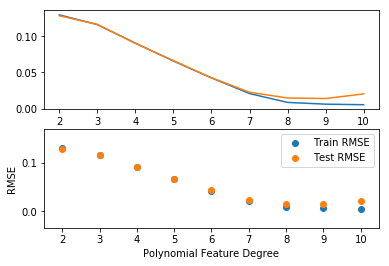

Work Flow 2


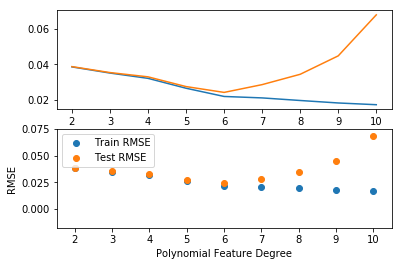

Work Flow 3


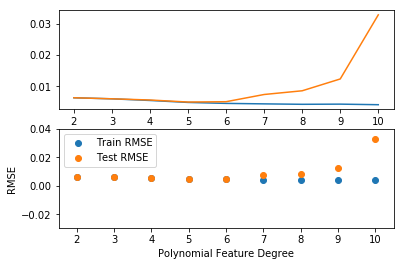

Work Flow 4


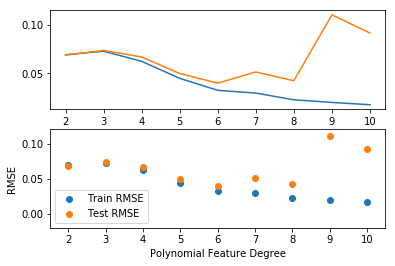

In [3]:
#from sklearn.model_selection import KFold
#from sklearn import linear_model
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import mean_squared_error
#from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = data[:,0:5]
y = data[:,5]

degrees = range(2, 11)
avgTrainRMSEs, avgTestRMSEs = [], []

for wid in range(5):
    print("Work Flow %i" % wid)
    avgTrainRMSEs, avgTestRMSEs = [], []
    wid_data = data[(data[:,3] == wid)]
    X_wid = np.delete(wid_data[:,0:5], 3, axis=1)
    y_wid = wid_data[:,5]
   
    kf = KFold(10)
    k = 1
    lr = linear_model.LinearRegression()
    
    for p in degrees:
        X_p = PolynomialFeatures(p).fit_transform(X_wid)
        y_p = y_wid
    
        scaler = StandardScaler()
        X_p = scaler.fit_transform(X_p, y_p)

        kf = KFold(10)
        totalTrainRMSE, totalTestRMSE = 0, 0
        for train_index, test_index in kf.split(X_p): # Output 10 train test RMSE values
            X_train, X_test = X_p[train_index], X_p[test_index]
            y_train, y_test = y_p[train_index], y_p[test_index]
            lr = linear_model.LinearRegression()
            lr.fit(X_train, y_train)
            pred_train, pred_test = lr.predict(X_train), lr.predict(X_test)

            rmse_train, rmse_test = sqrt(mean_squared_error(y_train, pred_train)), sqrt(mean_squared_error(y_test, pred_test))
            totalTrainRMSE += rmse_train
            totalTestRMSE += rmse_test
            k += 1
        avgTrainRMSEs.append(totalTrainRMSE / 10)
        avgTestRMSEs.append(totalTestRMSE / 10)
    
    fig = plt.figure()
    
    ax1 = plt.subplot(211)
    ax1.plot(degrees, avgTrainRMSEs)
    ax1.plot(degrees, avgTestRMSEs)
    # plt.subplot(211)

    ax2 = plt.subplot(212)
    ax2.scatter(degrees, avgTrainRMSEs, label="Train RMSE")
    ax2.scatter(degrees, avgTestRMSEs, label="Test RMSE")    
    ax2.set_xticks(degrees)
    ax2.set_xlabel('Polynomial Feature Degree')
    ax2.set_ylabel('RMSE')
    
    plt.legend()
    plt.show()
    


           

    

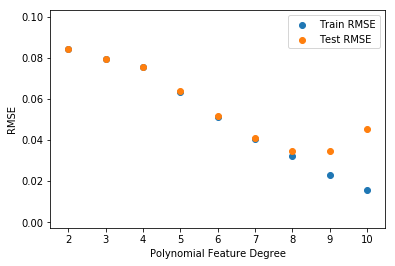

In [4]:

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = data[:,0:5]
y = data[:,5]

degrees = range(2, 11)
avgTrainRMSEs, avgTestRMSEs = [], []
for p in degrees:
    X_p = PolynomialFeatures(p).fit_transform(X)
    y_p = y
    
    scaler = StandardScaler()
    X_p = scaler.fit_transform(X_p, y_p)
    
    kf = KFold(10)
    totalTrainRMSE, totalTestRMSE = 0, 0
    for train_index, test_index in kf.split(X_p): # Output 10 train test RMSE values
        X_train, X_test = X_p[train_index], X_p[test_index]
        y_train, y_test = y_p[train_index], y_p[test_index]
        lr = linear_model.LinearRegression()
        lr.fit(X_train, y_train)
        pred_train, pred_test = lr.predict(X_train), lr.predict(X_test)

        rmse_train, rmse_test = sqrt(mean_squared_error(y_train, pred_train)), sqrt(mean_squared_error(y_test, pred_test))
        totalTrainRMSE += rmse_train
        totalTestRMSE += rmse_test
    avgTrainRMSEs.append(totalTrainRMSE / 10)
    avgTestRMSEs.append(totalTestRMSE / 10)
    
fig, ax = plt.subplots()
ax.scatter(degrees, avgTrainRMSEs, label="Train RMSE")
ax.scatter(degrees, avgTestRMSEs, label="Test RMSE")    
ax.set_xticks(degrees)
ax.set_xlabel('Polynomial Feature Degree')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

X = data[:,0:5]
y = data[:,5]

for nn in range(2,7):
    print("%i neighbors" % nn)
    kf = KFold(10)
    k = 1
    neigh = KNeighborsRegressor(n_neighbors=nn)
    totalTrainRMSE, totalTestRMSE = 0, 0
    for train_index, test_index in kf.split(X): # Output 10 train test RMSE values
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh.fit(X_train, y_train)
        pred_train, pred_test = neigh.predict(X_train), neigh.predict(X_test)

        rmse_train, rmse_test = sqrt(mean_squared_error(y_train, pred_train)), sqrt(mean_squared_error(y_test, pred_test))
        totalTrainRMSE += rmse_train
        totalTestRMSE += rmse_test
    print("\tavg train rmse = %.3f, avg test rmse = %.3f" % (totalTrainRMSE / 10, totalTestRMSE / 10))


2 neighbors
	avg train rmse = 0.029, avg test rmse = 0.033
3 neighbors
	avg train rmse = 0.030, avg test rmse = 0.036
4 neighbors
	avg train rmse = 0.028, avg test rmse = 0.037
5 neighbors
	avg train rmse = 0.027, avg test rmse = 0.043
6 neighbors
	avg train rmse = 0.028, avg test rmse = 0.047
